<a href="https://colab.research.google.com/github/seelamsettisahithi/amazon-product-reviews-sentiment-analysis/blob/main/Amazon_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import pandas as pd
import glob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import cohen_kappa_score


In [1]:
! pip install vaderSentiment

     |████████████████████████████████| 133kB 12.4MB/s 


In [3]:
from google.colab import files
uploaded = files.upload()

Saving camera_EDA.csv to camera_EDA.csv


In [4]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['camera_EDA.csv']))

In [5]:
df.head()

,Unnamed: 0,reviews,ratings
0,0,ok dslr giant canon launched entry level dslr ...,2.0
1,1,good camera beginner,5.0
2,2,great camera perfect product young budding pho...,5.0
3,3,really impressed amazon surprise delivering wi...,5.0
4,4,buy product canon local service center help ev...,1.0


In [6]:
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [9]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [11]:

# removing NA values from data frame
df.dropna(inplace=True)

In [13]:

sid.polarity_scores(df.iloc[0]['reviews'])

{'compound': 0.8803, 'neg': 0.127, 'neu': 0.69, 'pos': 0.183}

In [14]:

df['scores'] = df['reviews'].apply(lambda reviews:sid.polarity_scores(reviews))

In [16]:
df.head(10)

,Unnamed: 0,reviews,ratings,scores
0,0,ok dslr giant canon launched entry level dslr ...,2.0,"{'neg': 0.127, 'neu': 0.69, 'pos': 0.183, 'com..."
1,1,good camera beginner,5.0,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."
2,2,great camera perfect product young budding pho...,5.0,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
3,3,really impressed amazon surprise delivering wi...,5.0,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp..."
4,4,buy product canon local service center help ev...,1.0,"{'neg': 0.103, 'neu': 0.733, 'pos': 0.164, 'co..."
5,5,request replacement camera main body lot black...,1.0,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp..."
6,6,received product dslr cannon october adopter g...,2.0,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp..."
7,7,auto focus perfectminimum aperture dont expect...,3.0,"{'neg': 0.134, 'neu': 0.738, 'pos': 0.128, 'co..."
8,8,want upgrade camera point shoot dslr good came...,4.0,"{'neg': 0.262, 'neu': 0.536, 'pos': 0.202, 'co..."
9,9,really fully content product reached within tw...,5.0,"{'neg': 0.162, 'neu': 0.73, 'pos': 0.108, 'com..."


In [17]:

df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [18]:
df.head(10)

,Unnamed: 0,reviews,ratings,scores,compound
0,0,ok dslr giant canon launched entry level dslr ...,2.0,"{'neg': 0.127, 'neu': 0.69, 'pos': 0.183, 'com...",0.8803
1,1,good camera beginner,5.0,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404
2,2,great camera perfect product young budding pho...,5.0,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.8934
3,3,really impressed amazon surprise delivering wi...,5.0,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.9801
4,4,buy product canon local service center help ev...,1.0,"{'neg': 0.103, 'neu': 0.733, 'pos': 0.164, 'co...",0.4215
5,5,request replacement camera main body lot black...,1.0,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182
6,6,received product dslr cannon october adopter g...,2.0,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...",-0.3612
7,7,auto focus perfectminimum aperture dont expect...,3.0,"{'neg': 0.134, 'neu': 0.738, 'pos': 0.128, 'co...",-0.1280
8,8,want upgrade camera point shoot dslr good came...,4.0,"{'neg': 0.262, 'neu': 0.536, 'pos': 0.202, 'co...",-0.6124
9,9,really fully content product reached within tw...,5.0,"{'neg': 0.162, 'neu': 0.73, 'pos': 0.108, 'com...",-0.4863


In [19]:

df['senti'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [20]:
df.head(10)

,Unnamed: 0,reviews,ratings,scores,compound,senti
0,0,ok dslr giant canon launched entry level dslr ...,2.0,"{'neg': 0.127, 'neu': 0.69, 'pos': 0.183, 'com...",0.8803,pos
1,1,good camera beginner,5.0,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,pos
2,2,great camera perfect product young budding pho...,5.0,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.8934,pos
3,3,really impressed amazon surprise delivering wi...,5.0,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.9801,pos
4,4,buy product canon local service center help ev...,1.0,"{'neg': 0.103, 'neu': 0.733, 'pos': 0.164, 'co...",0.4215,pos
5,5,request replacement camera main body lot black...,1.0,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,pos
6,6,received product dslr cannon october adopter g...,2.0,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...",-0.3612,neg
7,7,auto focus perfectminimum aperture dont expect...,3.0,"{'neg': 0.134, 'neu': 0.738, 'pos': 0.128, 'co...",-0.1280,neg
8,8,want upgrade camera point shoot dslr good came...,4.0,"{'neg': 0.262, 'neu': 0.536, 'pos': 0.202, 'co...",-0.6124,neg
9,9,really fully content product reached within tw...,5.0,"{'neg': 0.162, 'neu': 0.73, 'pos': 0.108, 'com...",-0.4863,neg


In [21]:
print(df.isnull().sum())

Unnamed: 0    0
reviews       0
ratings       0
scores        0
compound      0
senti         0
dtype: int64


In [22]:
senti = df.drop(df.columns[[0]], axis=1)

In [23]:
senti.head()

,reviews,ratings,scores,compound,senti
0,ok dslr giant canon launched entry level dslr ...,2.0,"{'neg': 0.127, 'neu': 0.69, 'pos': 0.183, 'com...",0.8803,pos
1,good camera beginner,5.0,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,pos
2,great camera perfect product young budding pho...,5.0,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.8934,pos
3,really impressed amazon surprise delivering wi...,5.0,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.9801,pos
4,buy product canon local service center help ev...,1.0,"{'neg': 0.103, 'neu': 0.733, 'pos': 0.164, 'co...",0.4215,pos


In [24]:
senti['senti'].value_counts()

pos    2798
neg     170
Name: senti, dtype: int64

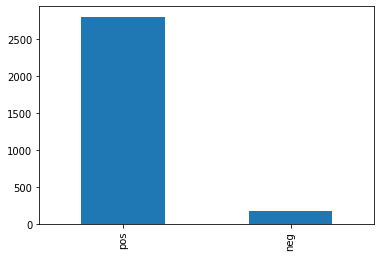

In [25]:
senti['senti'].value_counts().plot.bar()

In [26]:
from sklearn import preprocessing

In [27]:
label_encoder = preprocessing.LabelEncoder()

In [28]:
senti['senti']= label_encoder.fit_transform(df['senti'])

In [29]:
senti['senti'].unique()

array([1, 0])

In [30]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [31]:
senti['reviews']=senti.reviews.apply(cleaning_text)

In [32]:
senti.head(10)

,reviews,ratings,scores,compound,senti
0,dslr giant canon launched entry level dslr act...,2.0,"{'neg': 0.127, 'neu': 0.69, 'pos': 0.183, 'com...",0.8803,1
1,good camera beginner,5.0,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,1
2,great camera perfect product young budding pho...,5.0,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.8934,1
3,really impressed amazon surprise delivering wi...,5.0,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.9801,1
4,product canon local service center help even p...,1.0,"{'neg': 0.103, 'neu': 0.733, 'pos': 0.164, 'co...",0.4215,1
5,request replacement camera main body blackspot...,1.0,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.3182,1
6,received product dslr cannon october adopter g...,2.0,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...",-0.3612,0
7,auto focus perfectminimum aperture dont expect...,3.0,"{'neg': 0.134, 'neu': 0.738, 'pos': 0.128, 'co...",-0.1280,0
8,want upgrade camera point shoot dslr good came...,4.0,"{'neg': 0.262, 'neu': 0.536, 'pos': 0.202, 'co...",-0.6124,0
9,really fully content product reached within ev...,5.0,"{'neg': 0.162, 'neu': 0.73, 'pos': 0.108, 'com...",-0.4863,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
split = senti[['reviews', 'senti']]
train = split.sample(frac=0.8,random_state = 200)
test = split.drop(train.index)

In [35]:
train.shape

(2374, 2)

In [36]:
test.shape

(594, 2)

In [38]:
trainX=train.reviews
trainy=train.senti
testX=test.reviews
testy=test.senti

In [40]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
stopwords = set(STOPWORDS)
stopwords.remove("not")

In [42]:
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

In [43]:
X_train_counts = count_vect.fit_transform(train["reviews"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [45]:
X_new_counts = count_vect.transform(test["reviews"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Logistic Regresssion

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_tfidf,trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred=model.predict(X_test_tfidf)

In [97]:
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]
[fpr, tpr, thr] = roc_curve(testy, y_pred_proba)

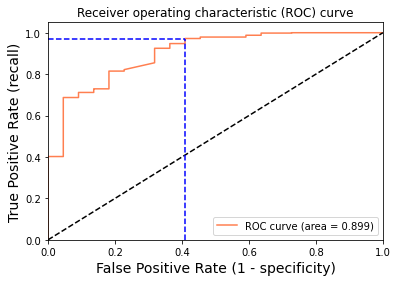

In [98]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [51]:
print(accuracy_score(testy,y_pred))
print(classification_report(testy,y_pred))
print(confusion_matrix(testy,y_pred))
print(cohen_kappa_score(testy,y_pred))

0.9696969696969697
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        22
           1       0.97      1.00      0.98       572

    accuracy                           0.97       594
   macro avg       0.98      0.59      0.65       594
weighted avg       0.97      0.97      0.96       594

[[  4  18]
 [  0 572]]
0.2997118155619596


In [100]:
cm=confusion_matrix(testy,y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)


In [101]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9696969696969697 
 The Missclassification = 1-Accuracy =  0.030303030303030276 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.18181818181818182 
 Positive Predictive value = TP/(TP+FP) =  0.9694915254237289 
 Negative predictive Value = TN/(TN+FN) =  1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.2222222222222223 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


# Logistic Regression After SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm=SMOTE(random_state=444)

In [54]:
X_train_res, y_train_res = sm.fit_resample(X_train_tfidf, trainy)

In [55]:
model2=LogisticRegression()
model2.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred2=model2.predict(X_test_tfidf)

In [57]:
print(accuracy_score(testy,y_pred2))
print(classification_report(testy,y_pred2))
print(confusion_matrix(testy,y_pred2))
print(cohen_kappa_score(testy,y_pred2))

0.8552188552188552
              precision    recall  f1-score   support

           0       0.17      0.73      0.27        22
           1       0.99      0.86      0.92       572

    accuracy                           0.86       594
   macro avg       0.58      0.79      0.60       594
weighted avg       0.96      0.86      0.90       594

[[ 16   6]
 [ 80 492]]
0.22444889779559118


# MultiNomial NB

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
model3=MultinomialNB()
model3.fit(X_train_tfidf,trainy)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
y_pred3=model3.predict(X_test_tfidf)

In [62]:
print(accuracy_score(testy,y_pred3))
print(classification_report(testy,y_pred3))
print(confusion_matrix(testy,y_pred3))
print(cohen_kappa_score(testy,y_pred3))

0.9629629629629629
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98       572

    accuracy                           0.96       594
   macro avg       0.48      0.50      0.49       594
weighted avg       0.93      0.96      0.94       594

[[  0  22]
 [  0 572]]
0.0


# Multinomial NB after SMOTE

In [64]:
sm=SMOTE(random_state=444)

In [65]:
model4=MultinomialNB()
model4.fit(X_train_res,y_train_res)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
y_pred4=model4.predict(X_test_tfidf)

In [67]:
print(accuracy_score(testy,y_pred4))
print(classification_report(testy,y_pred4))
print(confusion_matrix(testy,y_pred4))
print(cohen_kappa_score(testy,y_pred4))

0.8636363636363636
              precision    recall  f1-score   support

           0       0.18      0.73      0.28        22
           1       0.99      0.87      0.92       572

    accuracy                           0.86       594
   macro avg       0.58      0.80      0.60       594
weighted avg       0.96      0.86      0.90       594

[[ 16   6]
 [ 75 497]]
0.23771348902056466


# Bernouli NB

In [68]:
from sklearn.naive_bayes import BernoulliNB

In [69]:
model5=BernoulliNB()
model5.fit(X_train_tfidf,trainy)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [70]:
y_pred5=model5.predict(X_test_tfidf)

In [71]:
print(accuracy_score(testy,y_pred5))
print(classification_report(testy,y_pred5))
print(confusion_matrix(testy,y_pred5))
print(cohen_kappa_score(testy,y_pred5))

0.9276094276094277
              precision    recall  f1-score   support

           0       0.08      0.09      0.09        22
           1       0.96      0.96      0.96       572

    accuracy                           0.93       594
   macro avg       0.52      0.53      0.52       594
weighted avg       0.93      0.93      0.93       594

[[  2  20]
 [ 23 549]]
0.047579983593109


# bernouli NB after SMOTE

In [72]:
model6=BernoulliNB()
model6.fit(X_train_res,y_train_res)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [73]:
y_pred6=model6.predict(X_test_tfidf)

In [74]:
print(accuracy_score(testy,y_pred6))
print(classification_report(testy,y_pred6))
print(confusion_matrix(testy,y_pred6))
print(cohen_kappa_score(testy,y_pred6))

0.9494949494949495
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        22
           1       0.98      0.97      0.97       572

    accuracy                           0.95       594
   macro avg       0.67      0.71      0.69       594
weighted avg       0.96      0.95      0.95       594

[[ 10  12]
 [ 18 554]]
0.37403400309119006


# SVM

In [75]:
from sklearn.svm import LinearSVC
model7=LinearSVC()
model7.fit(X_train_tfidf,trainy)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [76]:
y_pred7=model7.predict(X_test_tfidf)

In [77]:
print(accuracy_score(testy,y_pred7))
print(classification_report(testy,y_pred7))
print(confusion_matrix(testy,y_pred7))
print(cohen_kappa_score(testy,y_pred7))

0.9696969696969697
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        22
           1       0.98      0.99      0.98       572

    accuracy                           0.97       594
   macro avg       0.82      0.68      0.73       594
weighted avg       0.96      0.97      0.97       594

[[  8  14]
 [  4 568]]
0.4563758389261745


# SVM after SMOTE

In [78]:
model8=LinearSVC()
model8.fit(X_train_res,y_train_res)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [79]:
y_pred8=model8.predict(X_test_tfidf)

In [80]:
print(accuracy_score(testy,y_pred8))
print(classification_report(testy,y_pred8))
print(confusion_matrix(testy,y_pred8))
print(cohen_kappa_score(testy,y_pred8))

0.8838383838383839
              precision    recall  f1-score   support

           0       0.18      0.59      0.27        22
           1       0.98      0.90      0.94       572

    accuracy                           0.88       594
   macro avg       0.58      0.74      0.61       594
weighted avg       0.95      0.88      0.91       594

[[ 13   9]
 [ 60 512]]
0.22984704423315405


# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
model9=DecisionTreeClassifier(criterion='entropy')
model9.fit(X_train_tfidf,trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
y_pred9=model9.predict(X_test_tfidf)

In [83]:
print(accuracy_score(testy,y_pred9))
print(classification_report(testy,y_pred9))
print(confusion_matrix(testy,y_pred9))
print(cohen_kappa_score(testy,y_pred9))

0.9511784511784511
              precision    recall  f1-score   support

           0       0.35      0.36      0.36        22
           1       0.98      0.97      0.97       572

    accuracy                           0.95       594
   macro avg       0.66      0.67      0.67       594
weighted avg       0.95      0.95      0.95       594

[[  8  14]
 [ 15 557]]
0.330196749358426


# Decision Tree after SMOTE

In [84]:
model10=DecisionTreeClassifier(criterion='entropy')
model10.fit(X_train_res,y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
y_pred10=model10.predict(X_test_tfidf)

In [86]:
print(accuracy_score(testy,y_pred10))
print(classification_report(testy,y_pred10))
print(confusion_matrix(testy,y_pred10))
print(cohen_kappa_score(testy,y_pred10))

0.8804713804713805
              precision    recall  f1-score   support

           0       0.16      0.55      0.25        22
           1       0.98      0.89      0.94       572

    accuracy                           0.88       594
   macro avg       0.57      0.72      0.59       594
weighted avg       0.95      0.88      0.91       594

[[ 12  10]
 [ 61 511]]
0.20752377015295564


# Neural Networks

In [88]:
! pip install scikit-neuralnetwork 

     |████████████████████████████████| 2.8MB 16.5MB/s 
     |████████████████████████████████| 133kB 43.0MB/s 
  Created wheel for scikit-neuralnetwork: filename=scikit_neuralnetwork-0.7-cp37-none-any.whl size=41698 sha256=3d631e1363ba4c214fd4aff1f5753cc5bd1cce028c5bf0a499e1b9cc0aad1305
  Stored in directory: /root/.cache/pip/wheels/7a/2c/db/ad3c876767bfdaf955ede9b7c0315a99abb12c0bdd2a469eff
  Created wheel for Theano: filename=Theano-1.0.5-cp37-none-any.whl size=2668111 sha256=ec69b846ed23a08cd05bd235e7d810de97702ba8144f06a452b211819ca86505
  Stored in directory: /root/.cache/pip/wheels/89/40/74/3a0b7d937890c66c4373120117ebf4ba99f4889b4a0a6a810c
  Created wheel for Lasagne: filename=Lasagne-0.1-cp37-none-any.whl size=79284 sha256=2f36e39d1491b03ea3a11c353c1952c8b11cb4352d6b7ad88a76a08e2902d6ff
  Stored in directory: /root/.cache/pip/wheels/a5/8e/31/b4cae7e5507f8582e77d7f5cf2815be8820ccacfa0519ca60c
Successfully built scikit-neuralnetwork Theano Lasagne


In [89]:
from sklearn.neural_network import MLPClassifier

In [90]:
model11=MLPClassifier(hidden_layer_sizes=(5,5))
model11.fit(X_train_tfidf,trainy)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [91]:
y_pred11=model11.predict(X_test_tfidf)

In [92]:
print(accuracy_score(testy,y_pred11))
print(classification_report(testy,y_pred11))
print(confusion_matrix(testy,y_pred11))
print(cohen_kappa_score(testy,y_pred11))

0.9074074074074074
              precision    recall  f1-score   support

           0       0.21      0.55      0.30        22
           1       0.98      0.92      0.95       572

    accuracy                           0.91       594
   macro avg       0.60      0.73      0.63       594
weighted avg       0.95      0.91      0.93       594

[[ 12  10]
 [ 45 527]]
0.2644873699851411


# Neural Network after SMOTE

In [93]:
model12=MLPClassifier(hidden_layer_sizes=(5,5))
model12.fit(X_train_res,y_train_res)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [94]:
y_pred12=model12.predict(X_test_tfidf)


In [95]:
print(accuracy_score(testy,y_pred12))
print(classification_report(testy,y_pred12))
print(confusion_matrix(testy,y_pred12))
print(cohen_kappa_score(testy,y_pred12))

0.8821548821548821
              precision    recall  f1-score   support

           0       0.19      0.68      0.30        22
           1       0.99      0.89      0.94       572

    accuracy                           0.88       594
   macro avg       0.59      0.79      0.62       594
weighted avg       0.96      0.88      0.91       594

[[ 15   7]
 [ 63 509]]
0.2570754716981133
